In [1]:
from __future__ import print_function

In [45]:
folder = 'figures'
! mkdir $folder

mkdir: cannot create directory `figures': File exists


In [46]:
figure_folder = '{}/007_lavalamp_modalities'.format(folder)
! mkdir $figure_folder

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-08-29 11:13:33	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-08-29 11:13:33	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-08-29 11:14:09 	Initializing Study
2016-08-29 11:14:09 	Initializing Predictor configuration manager for Study
2016-08-29 11:14:09	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-08-29 11:14:09	Added ExtraTreesClassifier to default predictors
2016-08-29 11:14:09	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-08-29 11:14:09	Added ExtraTreesRegressor to default predictors
2016-08-29 11:14:09	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-08-29 11:14:09	Added GradientBoostingClassi

Error loading species hg19 data: HTTP Error 404: Not Found

In [4]:
modalities = study.supplemental.modalities_tidy.query("phenotype == 'iPSC'")
print(modalities.shape)
modalities.head()

(11871, 3)


,phenotype,event_id,modality
14146,iPSC,exon:chr10:100190328-100190427:-@exon:chr10:10...,bimodal
14147,iPSC,exon:chr10:100195392-100195529:-@exon:chr10:10...,bimodal
14148,iPSC,exon:chr10:101165513-101165617:-@exon:chr10:10...,included
14149,iPSC,exon:chr10:101480744-101480825:-@exon:chr10:10...,included
14150,iPSC,exon:chr10:101507014-101507147:+@exon:chr10:10...,bimodal


In [8]:
ipsc_samples = study.metadata.data.query('phenotype == "iPSC"').index

In [9]:
ipsc_singles = study.splicing.singles.loc[ipsc_samples].dropna(how='all', axis=1).dropna(how='all', axis=0)
print(ipsc_singles.shape)
ipsc_singles.head()

(59, 16062)


,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515465:+,exon:chr10:101964263-101964414:-@exon:chr10:101961845-101961906:-@exon:chr10:101960428-101960537:-,exon:chr10:101969352-101969546:-@exon:chr10:101966987-101967089:-@exon:chr10:101964833-101964956:-,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,...,exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-@exon:chrY:21897507-21897636:-,exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+,exon:chrY:2821950-2822038:+@exon:chrY:2829115-2829687:+@exon:chrY:2843136-2843285:+,exon:chrY:2843552-2843695:+@exon:chrY:2844711-2844863:+@exon:chrY:2845981-2846121:+
P1_01,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1,...,NaN,NaN,1.000000,1,1,1,1,1,NaN,NaN
P1_02,NaN,NaN,NaN,1,1,1.000000,NaN,NaN,NaN,NaN,...,NaN,1,0.856209,1,1,1,1,1,NaN,NaN
P1_03,NaN,NaN,NaN,NaN,1,0.217391,1,NaN,NaN,1,...,NaN,NaN,1.000000,1,1,1,1,1,NaN,NaN
P1_04,NaN,NaN,NaN,NaN,1,1.000000,NaN,NaN,NaN,1,...,NaN,NaN,0.893250,1,1,1,1,1,NaN,NaN
P1_05,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,1,1,1,1,1,NaN,NaN


In [10]:
ipsc_pooled = study.splicing.pooled.loc[ipsc_samples].dropna(how='all', axis=1).dropna(how='all', axis=0)
print(ipsc_pooled.shape)
ipsc_pooled.head()

(2, 10953)


,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515465:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,...,exon:chrY:15027542-15027686:+@exon:chrY:15027795-15027939:+@exon:chrY:15028173-15028354:+,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:15560897-15560946:-@exon:chrY:15526615-15526673:-@exon:chrY:15522873-15522993:-,exon:chrY:15591134-15591384:-@exon:chrY:15582001-15582109:-@exon:chrY:15560897-15560946:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+
M2nd_33,NaN,NaN,1.000000,0.781250,1.000000,1,1,NaN,NaN,NaN,...,1,1,1,NaN,1,1.00000,1,1,1,1.000000
M2nd_34,0,1,0.714286,0.757848,0.911765,1,1,1,1,1,...,1,1,NaN,1,1,0.99336,1,1,1,0.991952


In [11]:
from anchor import MODALITY_TO_COLOR

In [16]:
%pdb

Automatic pdb calling has been turned ON


In [27]:
sns.set(context='paper', style='ticks')

(59, 20) (2, 20)
(59, 20) (2, 20)
(59, 20) (2, 20)
(59, 20) (2, 20)


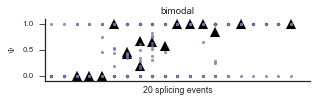

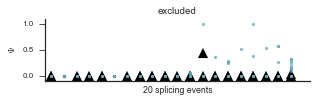

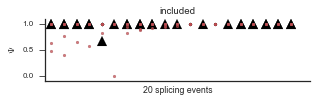

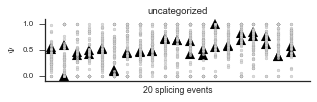

In [47]:
np.random.seed(2023)

size = 20

for modality, df in modalities.groupby('modality'):
    try:
        random_events = np.random.choice(df['event_id'], size=size, replace=False)
    except ValueError:
        continue
    
    singles = ipsc_singles.loc[:, random_events]
    pooled = ipsc_pooled.loc[:, random_events].fillna(-1)
    
    print(singles.shape, pooled.shape)
    
    fig, ax = plt.subplots(figsize=(4.5, 1.5))
    
    singles_color = MODALITY_TO_COLOR[modality]
    
    flotilla.visualize.splicing.lavalamp(pooled, color='black', ax=ax, markersize=10, 
                                         alpha=1, marker='^',
                                         switchy_score_psi=singles)
    flotilla.visualize.splicing.lavalamp(singles, color=singles_color, ax=ax, alpha=0.75, markersize=3)
    ax.set(ylim=(-0.1, 1.1), title=modality)
    fig.tight_layout()
    fig.savefig('{}/{}_{}_{}events_lavalamp.pdf'.format(figure_folder, 'iPSC', modality, size))

In [54]:
pooled_tidy = pooled.unstack().reset_index()
pooled_tidy = pooled_tidy.rename(columns={"level_0": 'event_id', 'level_1': 'sample_id', 0: 'Psi'})
pooled_tidy['cells'] = 'pooled'
pooled_tidy.head()

,event_id,sample_id,Psi,cells
0,exon:chr1:85725041-85725316:-@exon:chr1:857246...,M2nd_33,1.000000,pooled
1,exon:chr1:85725041-85725316:-@exon:chr1:857246...,M2nd_34,0.558140,pooled
2,exon:chr17:5326089-5326149:+@exon:chr17:532929...,M2nd_33,0.686567,pooled
3,exon:chr17:5326089-5326149:+@exon:chr17:532929...,M2nd_34,0.828221,pooled
4,exon:chr1:33099246-33099328:-@exon:chr1:330974...,M2nd_33,0.417722,pooled


In [55]:
singles_tidy = singles.unstack().reset_index()
singles_tidy = singles_tidy.rename(columns={"level_0": 'event_id', 'level_1': 'sample_id', 0: 'Psi'})
singles_tidy['cells'] = 'singles'
singles_tidy.head()

,event_id,sample_id,Psi,cells
0,exon:chr1:85725041-85725316:-@exon:chr1:857246...,P1_01,1.000000,singles
1,exon:chr1:85725041-85725316:-@exon:chr1:857246...,P1_02,0.388988,singles
2,exon:chr1:85725041-85725316:-@exon:chr1:857246...,P1_03,0.404255,singles
3,exon:chr1:85725041-85725316:-@exon:chr1:857246...,P1_04,0.833333,singles
4,exon:chr1:85725041-85725316:-@exon:chr1:857246...,P1_05,0.617225,singles


In [56]:
pooled_singles = pd.concat([singles_tidy, pooled_tidy], ignore_index=True)

[[]]

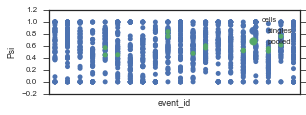

In [57]:
fig, ax = plt.subplots(figsize=(4.5, 1.5))

sns.stripplot(x='event_id', y='Psi', data=pooled_singles, hue='cells')
ax.set(xticks=[])

[[]]

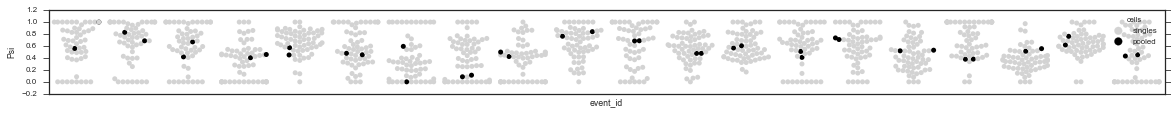

In [61]:
fig, ax = plt.subplots(figsize=(20, 1.5))

sns.swarmplot(x='event_id', y='Psi', data=pooled_singles, hue='cells', palette=[singles_color, 'k'])
ax.set(xticks=[])

In [94]:
pooled_singles['cells'] = pd.Categorical(pooled_singles['cells'], categories=['singles', 'pooled'], ordered=True)

[singles, singles, singles, singles, singles, ..., pooled, pooled, pooled, pooled, pooled]
Length: 610
Categories (2, object): [singles < pooled]

(3438, 3)
(2319, 3)
(59, 10) (2, 10)
(2293, 3)
(1993, 3)
(59, 10) (2, 10)
(6105, 3)
(5301, 3)
(59, 10) (2, 10)
(1, 3)
(1, 3)
(34, 3)
(34, 3)
(59, 10) (2, 10)


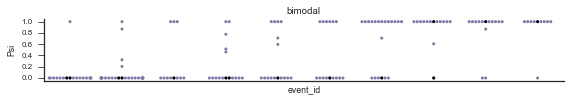

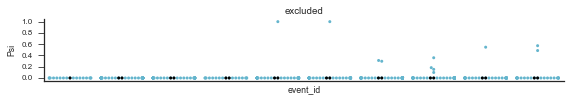

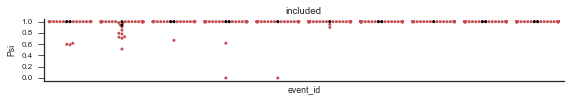

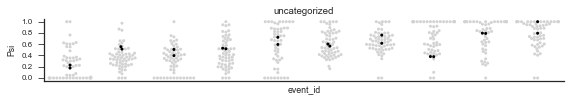

In [96]:
np.random.seed(2016)

size = 10

for modality, df in modalities.groupby('modality'):
    print(df.shape)
    df = df.query('event_id in @ipsc_pooled.columns')
    print(df.shape)
    try:
        random_events = np.random.choice(df['event_id'], size=size, replace=False)
    except ValueError:
        continue
    
    singles = ipsc_singles.loc[:, random_events]
    pooled = ipsc_pooled.loc[:, random_events].fillna(-.1)
    
    print(singles.shape, pooled.shape)
    
    pooled_tidy = pooled.unstack().reset_index()
    pooled_tidy = pooled_tidy.rename(columns={"level_0": 'event_id', 'level_1': 'sample_id', 0: 'Psi'})
    pooled_tidy['cells'] = 'pooled'
    
    singles_tidy = singles.unstack().reset_index()
    singles_tidy = singles_tidy.rename(columns={"level_0": 'event_id', 'level_1': 'sample_id', 0: 'Psi'})
    singles_tidy['cells'] = 'singles'
    
    order = singles.columns[flotilla.visualize.splicing.get_switchy_score_order(singles)]
    
    pooled_singles = pd.concat([singles_tidy, pooled_tidy], ignore_index=True)
    pooled_singles['cells'] = pd.Categorical(pooled_singles['cells'], categories=['singles', 'pooled'], ordered=True)
    
#     fig, ax = plt.subplots(figsize=(4.5, 1.5))
    
    singles_color = MODALITY_TO_COLOR[modality]
    
    fig, ax = plt.subplots(figsize=(8, 1.5))
    palette = [singles_color, 'k']

    for (cells, cell_df), color in zip(pooled_singles.groupby('cells'), palette):
        sns.swarmplot(x='event_id', y='Psi', data=cell_df, color=color, size=3,
                      order=order)
    ax.set(xticks=[])
    ax.set(ylim=(-0.05, 1.05), title=modality)
    fig.tight_layout()
    fig.savefig('{}/{}_{}_{}events_swarmplot.pdf'.format(figure_folder, 'iPSC', modality, size))
    
#     ax.legend_.set_visible(False)
    sns.despine()
    fig.savefig('{}/{}_{}_{}events_swarmplot_no_legend.pdf'.format(figure_folder, 'iPSC', modality, size))

In [ ]:
singles.columns[flotilla.visualize.splicing.get_switchy_score_order(singles)]

In [87]:
range(3)

[0, 1, 2]